# Espetro de Matrices Aleatorias 2

## Girko Circular law (ver clase 3)
Sea A una matriz nxn con entradas independientes con distribucion normal standard y sea B=A/sqrt(n). Realice un plot de los valores propios

In [1]:
using Interact

In [2]:
using Winston


Use "AbstractVecOrMat{T}(" instead.
INFO: Recompiling stale cache file /home/diego/.julia/lib/v0.4/Cairo.ji for module Cairo.
INFO: Recompiling stale cache file /home/diego/.julia/lib/v0.4/Colors.ji for module Colors.
INFO: Recompiling stale cache file /home/diego/.julia/lib/v0.4/FixedPointNumbers.ji for module FixedPointNumbers.
INFO: Recompiling stale cache file /home/diego/.julia/lib/v0.4/ColorTypes.ji for module ColorTypes.
INFO: Recompiling stale cache file /home/diego/.julia/lib/v0.4/Graphics.ji for module Graphics.


Considerar k matrices aleatorias (i.i.d. independientes y gaussianas) de tamaño nxn y realizar un gráfico de los valores propios complejos.

In [3]:
n=100 k=50

50

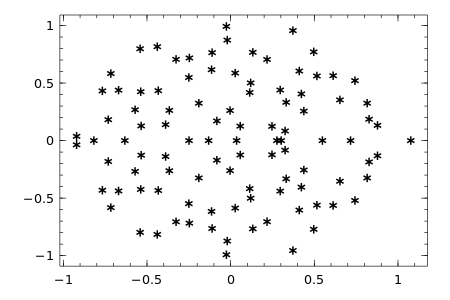

In [45]:
n=100
A=randn(n,n)
A=1/sqrt(n) *A
V=eigvals(A)
E=Array{Float64}(n,2)
E[:,1]=real(V)
E[:,2]=imag(V)
plot(E[:,1],E[:,2],"*")

Interact.Slider{Int64}(Signal{Int64}(20, nactions=0),"k",20,10:30,true)

Interact.Slider{Int64}(Signal{Int64}(550, nactions=0),"n",550,100:1000,true)

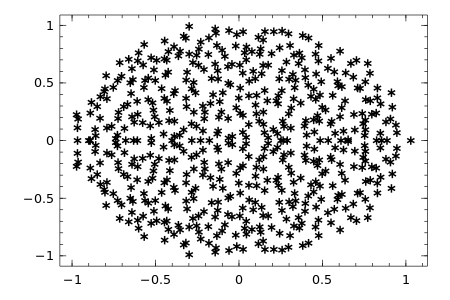

In [46]:
@manipulate for k=10:30, n=100:1000
    A=randn(n,n)
    A=1/sqrt(n)*A
V=eigvals(A)
E=Array{Float64}(n,2)
E[:,1]=real(V)
E[:,2]=imag(V)
plot(E[:,1],E[:,2],"*")
end

Hagamos lo mismo pero para uniformes independientes

Interact.Slider{Int64}(Signal{Int64}(20, nactions=0),"k",20,10:30,true)

Interact.Slider{Int64}(Signal{Int64}(550, nactions=0),"n",550,100:1000,true)

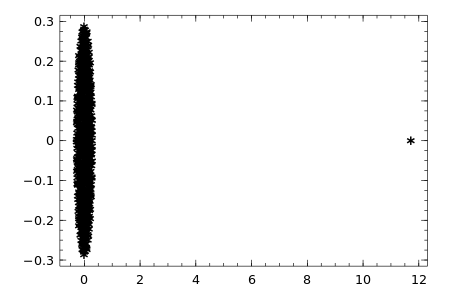

In [49]:
@manipulate for k=10:30, n=100:1000
    A=1/sqrt(n)*rand(n,n)
V=eigvals(A)
E=Array{Float64}(n,2)
    E[:,1]=real(V)
    E[:,2]=imag(V)
    plot(E[:,1],E[:,2],"*")
end

Interact.Slider{Int64}(Signal{Int64}(20, nactions=0),"k",20,10:30,true)

Interact.Slider{Int64}(Signal{Int64}(550, nactions=0),"n",550,100:1000,true)

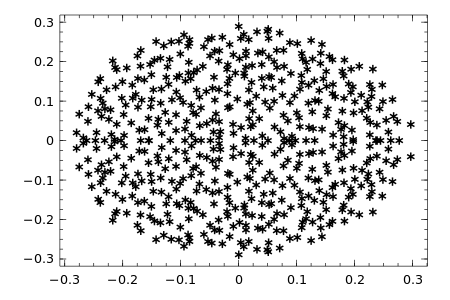

In [51]:
@manipulate for k=10:30, n=100:1000
    A=1/sqrt(n)*rand(n,n)
V=eigvals(A)
E=Array{Float64}(n-1,2)
    E[:,1]=real(V)[2:n]
    E[:,2]=imag(V)[2:n]
plot(E[:,1],E[:,2],"*")
end

# Álgebra Lineal

In [58]:
A=2*eye(3,3)

3x3 Array{Float64,2}:
 2.0  0.0  0.0
 0.0  2.0  0.0
 0.0  0.0  2.0

In [59]:
b=[1,2,3]

3-element Array{Int64,1}:
 1
 2
 3

In [60]:
A\b

3-element Array{Float64,1}:
 0.5
 1.0
 1.5

## Estabilidad y condicionamiento

 ### Escribir un programa que resuelva el siguiente sistema lineal:
 $$\begin{pmatrix} 1 &1 \\ 1 & 1+\varepsilon \end{pmatrix} \begin{pmatrix}x \\y \end{pmatrix}
 =\begin{pmatrix} 2\\ 2+\varepsilon\end{pmatrix}$$
 para diferentes valres de $\varepsilon$.
 
 #### Cuál es mínimo valor de $\varepsilon$ para que sus soluciones sean correctas?
 
 #### Hallar el número de condición dependiendo de $\varepsilon$ 
 __cond(A)__